### URL of Wikipedia page where the table is located
[List of airports in Germany ](https://en.wikipedia.org/wiki/List_of_airports_in_Germany)

This is a comprehensive list of airports in Germany, organized according to the table header, which includes the Location served, State, ICAO, IATA, and Airport name. ICAO, which stands for International Civil Aviation Organization, is a UN agency consisting of individual countries rather than airlines. Its mission is to oversee and regulate international air travel. Meanwhile, IATA, or International Air Transport Association, is a private association established to promote the common interests of the air transport industry and to ensure its safety and economic efficiency. IATA is also responsible for managing TASF and BSP-related tasks.

Most rows of the table follow the standard format, but there are some with blank IATA columns. Moreover, some rows are unique, such as those denoting Civil, Military, or Former airports, which are combined under a single column with the "colspan=5" tag. Thus, these rows require special attention.

Although the data can be accessed via the table tag, several tables are available, necessitating the use of the correct table class name to retrieve the accurate information.

date on which we last crawled : 28.02.23
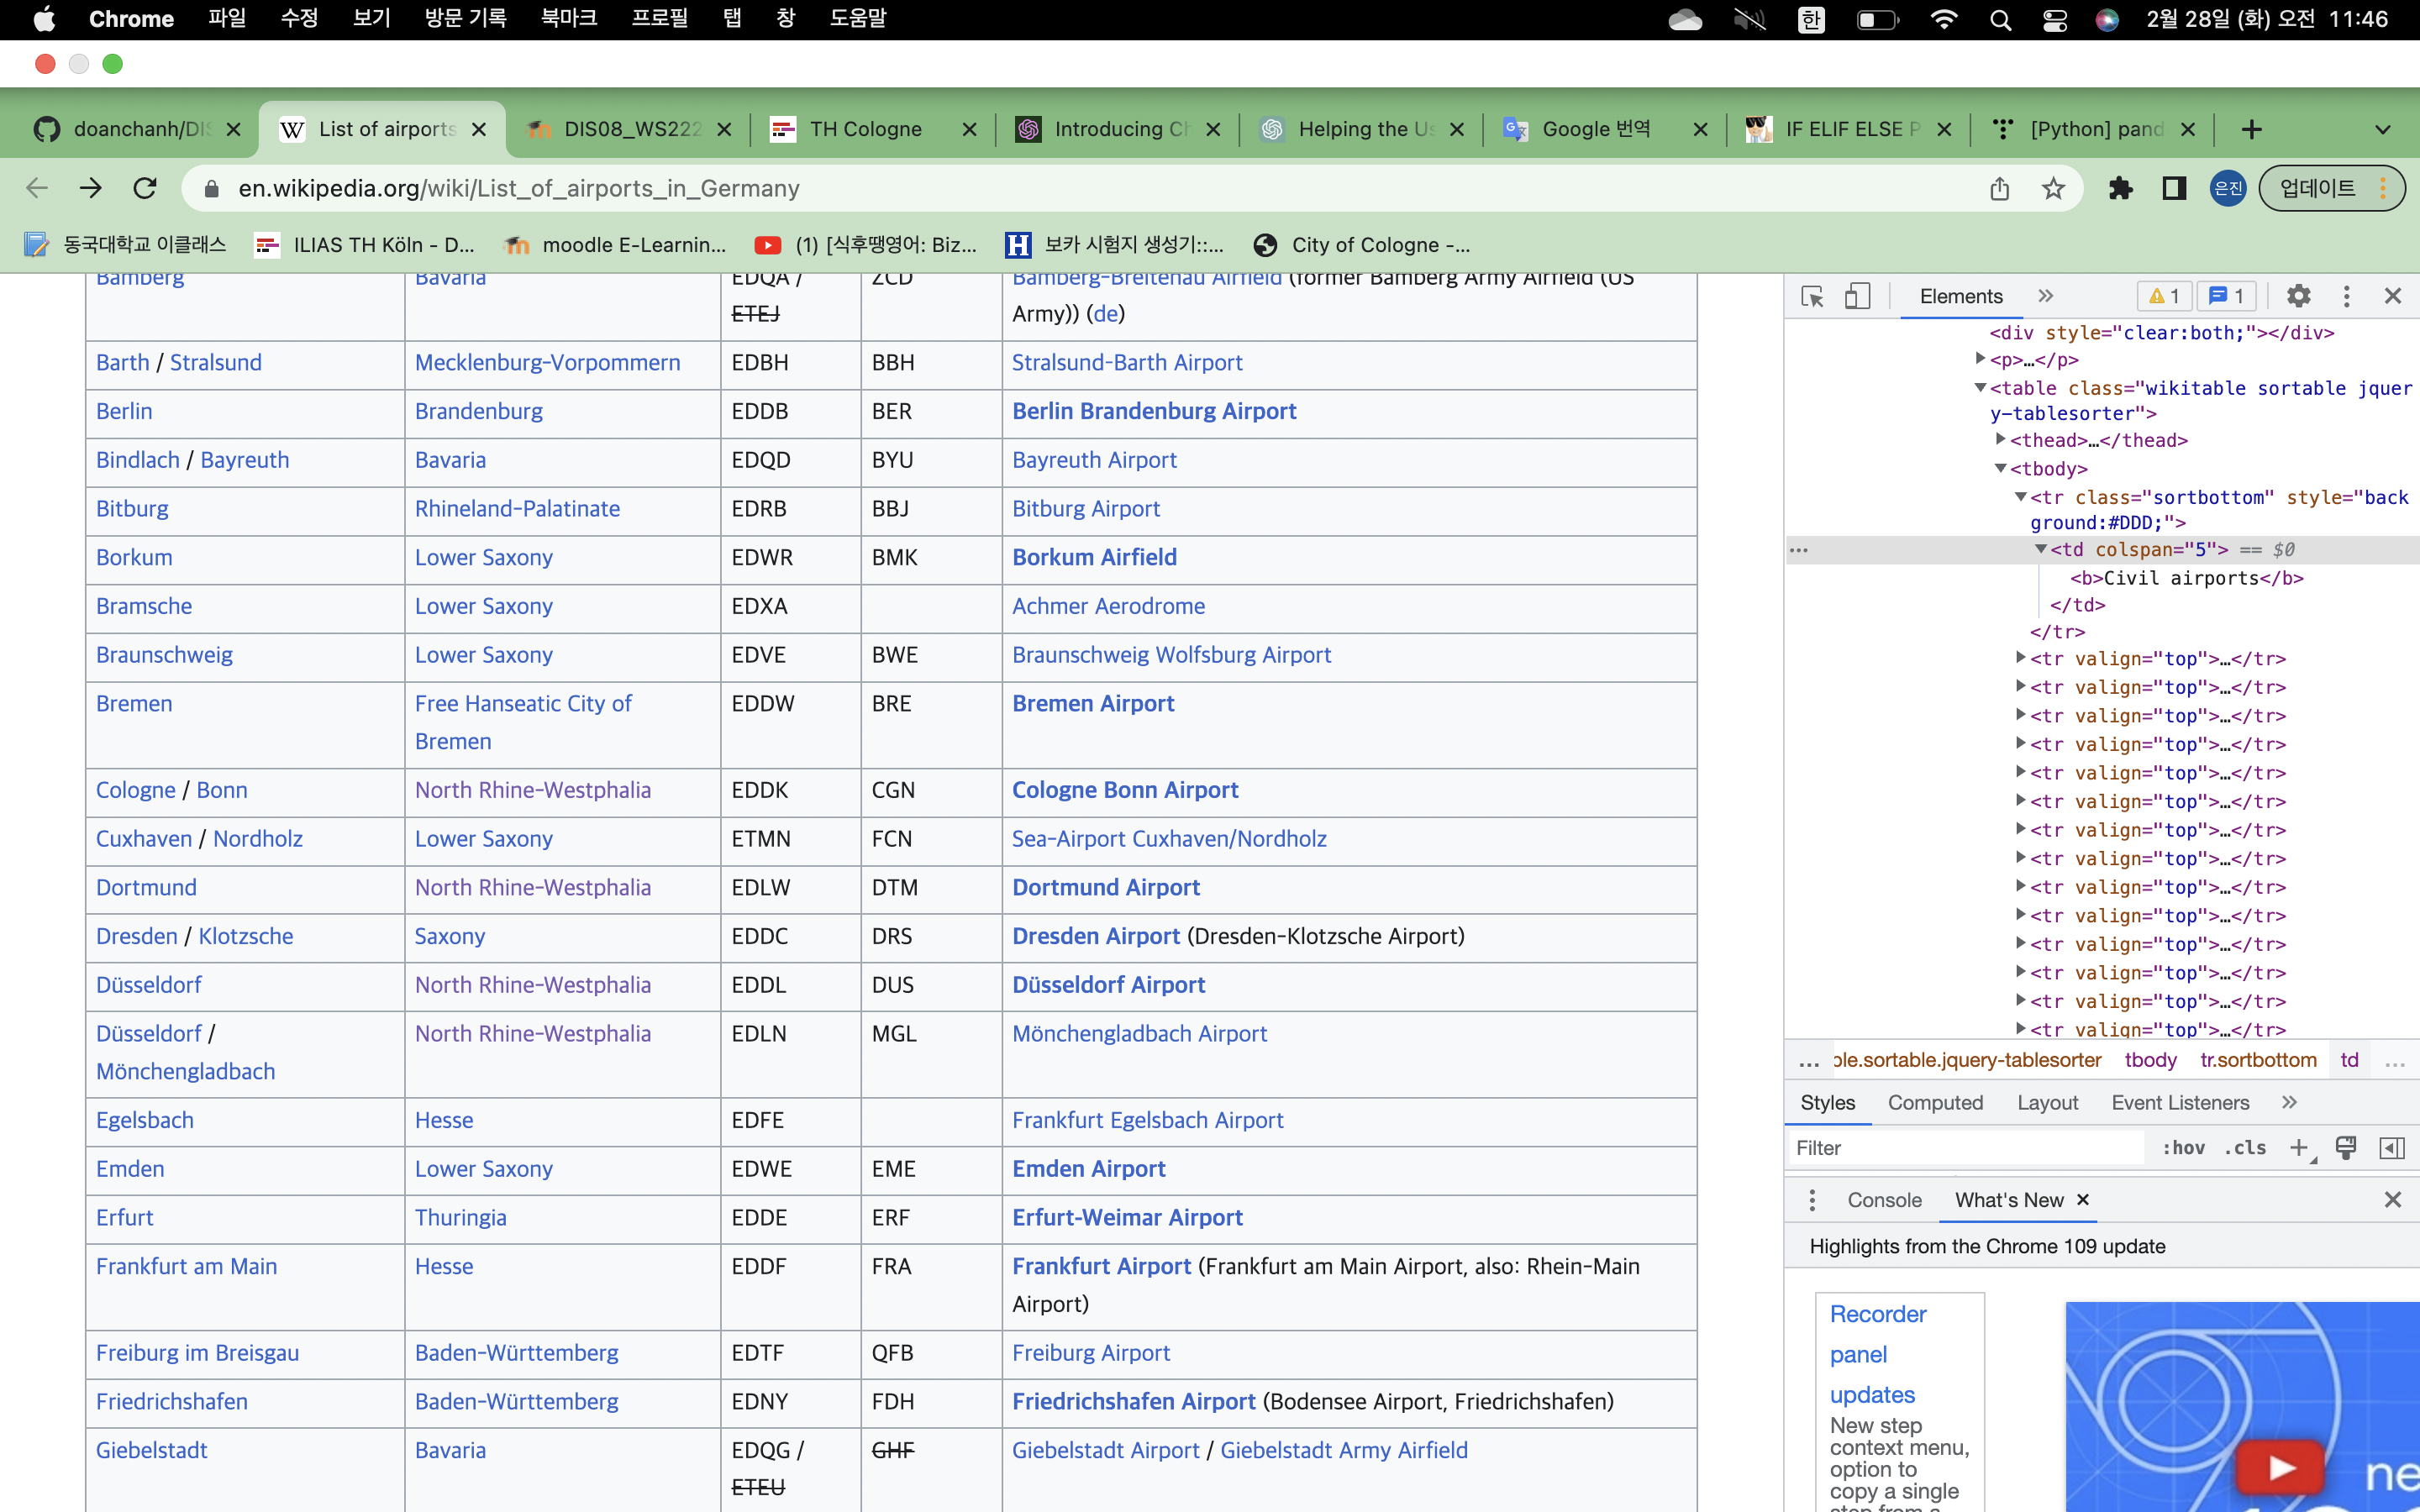

In [1]:
import bs4
import requests
import pandas as pd

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_airports_in_Germany"

In [3]:
#transforl url to bs4 document
website = requests.get(url)
doc = bs4.BeautifulSoup(website.content)
names = []

In [4]:
# retrieve all elements of element type 'table'
tables = doc.select('table')

In [5]:
print('Classes of each table:')
for table in tables:
    print(table.get('class'))

Classes of each table:
['wikitable', 'sortable']
['nowraplinks', 'mw-collapsible', 'expanded', 'navbox-inner']
['nowraplinks', 'navbox-subgroup']
['nowraplinks', 'mw-collapsible', 'autocollapse', 'navbox-inner']


In [6]:
# we want the table "wikitable", "sotable"

In [7]:
table = doc.find('table', class_='wikitable sortable')

In [8]:
#table

In [9]:
#collecting thead
headers = [header.text for header in table.find_all('th')]
headers

['Location served\n', 'State\n', 'ICAO\n', 'IATA\n', 'Airport name\n']

In [10]:
# eliminate line break by slicing "\n"
for i in range (0,len(headers)):
    headers[i] = headers[i][:-1]

In [11]:
headers

['Location served', 'State', 'ICAO', 'IATA', 'Airport name']

In [12]:
#define dataframe
df = pd.DataFrame(columns = headers)
df

,Location served,State,ICAO,IATA,Airport name


In [13]:
#collecting table rows
trs = table.tbody.find_all('tr')

In [14]:
scraped_data = []
for tr in trs:
    cols = tr.find_all('td')
    if len(cols)<2 and len(cols)>0 : #to deal columns with colspan and make it as a type of airport
        toa = cols[0].b.text
#     else:
#     if len(cols)>2:
    elif len(cols)>2 :
        # data frame is easy to deal with dictionary type. 
        # If we use simple list and append to data frame,
        # there are possibilities to meet error because dataframe wants data with 'index'
        details = {}
        details[headers[0]] = cols[0].a.text
        details[headers[1]] = cols[1].a.text
        details[headers[2]] = cols[2].text
        details[headers[3]] = cols[3].text
        details['type of airport'] = toa
        # there are columns with nothing in it. Deal that with try-excpet
        try:
            details[headers[4]] = cols[4].a.text
        except:
            details[headers[4]] = ''
        scraped_data.append(details)
    else:
        next
        

In [15]:
df = pd.DataFrame.from_dict(scraped_data)
df

,Location served,State,ICAO,IATA,type of airport,Airport name
0,Aachen,North Rhine-Westphalia,EDKA\n,AAH\n,Civil airports,Aachen-Merzbrück Airport
1,Allendorf,Hesse,EDFQ\n,\n,Civil airports,Allendorf Airport
2,Altenburg,Thuringia,EDAC\n,AOC\n,Civil airports,Leipzig-Altenburg Airport
3,Augsburg,Bavaria,EDMA\n,AGB\n,Civil airports,Augsburg Airport
4,Bad Gandersheim,Lower Saxony,EDVA\n,\n,Civil airports,Bad Gandersheim Aerodrome
...,...,...,...,...,...,...
104,Berlin,Berlin,EDDI\n,THF\n,Former airports,Berlin Tempelhof Airport
105,Bremerhaven,Free Hanseatic City of Bremen,EDWB\n,BRV\n,Former airports,Bremerhaven Airport
106,Cologne,North Rhine-Westphalia,ETBB\n,\n,Former airports,Cologne Butzweilerhof Airport
107,Hopsten,North Rhine-Westphalia,ETNP\n,\n,Former airports,Rheine-Hopsten Airbase


In [16]:
df

,Location served,State,ICAO,IATA,type of airport,Airport name
0,Aachen,North Rhine-Westphalia,EDKA\n,AAH\n,Civil airports,Aachen-Merzbrück Airport
1,Allendorf,Hesse,EDFQ\n,\n,Civil airports,Allendorf Airport
2,Altenburg,Thuringia,EDAC\n,AOC\n,Civil airports,Leipzig-Altenburg Airport
3,Augsburg,Bavaria,EDMA\n,AGB\n,Civil airports,Augsburg Airport
4,Bad Gandersheim,Lower Saxony,EDVA\n,\n,Civil airports,Bad Gandersheim Aerodrome
...,...,...,...,...,...,...
104,Berlin,Berlin,EDDI\n,THF\n,Former airports,Berlin Tempelhof Airport
105,Bremerhaven,Free Hanseatic City of Bremen,EDWB\n,BRV\n,Former airports,Bremerhaven Airport
106,Cologne,North Rhine-Westphalia,ETBB\n,\n,Former airports,Cologne Butzweilerhof Airport
107,Hopsten,North Rhine-Westphalia,ETNP\n,\n,Former airports,Rheine-Hopsten Airbase


In [17]:
#pickling data

df.to_pickle("germanyAirports.pkl")

In [18]:
pd.read_pickle("germanyAirports.pkl")

,Location served,State,ICAO,IATA,type of airport,Airport name
0,Aachen,North Rhine-Westphalia,EDKA\n,AAH\n,Civil airports,Aachen-Merzbrück Airport
1,Allendorf,Hesse,EDFQ\n,\n,Civil airports,Allendorf Airport
2,Altenburg,Thuringia,EDAC\n,AOC\n,Civil airports,Leipzig-Altenburg Airport
3,Augsburg,Bavaria,EDMA\n,AGB\n,Civil airports,Augsburg Airport
4,Bad Gandersheim,Lower Saxony,EDVA\n,\n,Civil airports,Bad Gandersheim Aerodrome
...,...,...,...,...,...,...
104,Berlin,Berlin,EDDI\n,THF\n,Former airports,Berlin Tempelhof Airport
105,Bremerhaven,Free Hanseatic City of Bremen,EDWB\n,BRV\n,Former airports,Bremerhaven Airport
106,Cologne,North Rhine-Westphalia,ETBB\n,\n,Former airports,Cologne Butzweilerhof Airport
107,Hopsten,North Rhine-Westphalia,ETNP\n,\n,Former airports,Rheine-Hopsten Airbase
